In [11]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

Import the necessary libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

<IPython.core.display.Javascript object>

Load the csv file into a DataFrame and check if successful.

In [13]:
data = "../WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(data)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<IPython.core.display.Javascript object>

In [14]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


<IPython.core.display.Javascript object>

Obtain an overview of the loaded data using `pandas`' various methods

In [15]:
# list of columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<IPython.core.display.Javascript object>

Check that the columns have the correct data type expecially columns that are supposed to only have numerical data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<IPython.core.display.Javascript object>

The result shows that the `TotalCharges` column's data type is an object. We proceed to convert that column to a float

In [17]:
df.TotalCharges.dtypes

dtype('O')

<IPython.core.display.Javascript object>

In [18]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors="coerce", downcast="float")
df.TotalCharges.dtypes

dtype('float32')

<IPython.core.display.Javascript object>

## 1. Demographic

In [19]:
sns.set(style="ticks")
demo = df.groupby(["gender", "Churn"]).count().reset_index()
demo

,gender,Churn,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,2549,2549,2549,2549,2549,2549,2549,2549,...,2549,2549,2549,2549,2549,2549,2549,2549,2549,2544
1,Female,Yes,939,939,939,939,939,939,939,939,...,939,939,939,939,939,939,939,939,939,939
2,Male,No,2625,2625,2625,2625,2625,2625,2625,2625,...,2625,2625,2625,2625,2625,2625,2625,2625,2625,2619
3,Male,Yes,930,930,930,930,930,930,930,930,...,930,930,930,930,930,930,930,930,930,930


<IPython.core.display.Javascript object>

In [22]:
df["Count"] = 1
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Count
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.500000,No,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes,1


<IPython.core.display.Javascript object>

In [24]:
df1 = df[["gender", "SeniorCitizen", "Partner", "Dependents", "Count"]]
df1.groupby(["gender", "SeniorCitizen"]).count().reset_index()

,gender,SeniorCitizen,Partner,Dependents,Count
0,Female,0,2920,2920,2920
1,Female,1,568,568,568
2,Male,0,2981,2981,2981
3,Male,1,574,574,574


<IPython.core.display.Javascript object>

Text(0, 0.5, 'No. of subscribers')

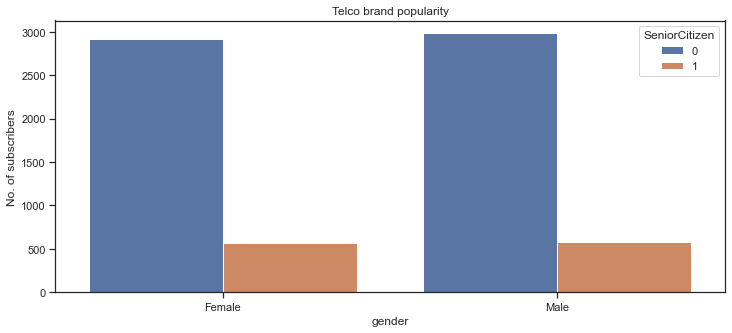

<IPython.core.display.Javascript object>

In [33]:
demo = df.groupby(["gender", "SeniorCitizen"])["Count"].count().reset_index()
plt.figure(figsize=(12, 5))
sns.barplot(x="gender", y="Count", hue="SeniorCitizen", data=demo)
plt.title("Telco brand popularity")
plt.ylabel("No. of subscribers")

The telco brand is more popular among both male and female non-senior citizens at almost equal rates. Female senior citizens are the least likely to become subscribers. To increase customer retention, they should tailor their marketing to senior citizens.

## Services